In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as func
import torchvision
import torchvision.transforms as transforms
import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.cuda.is_available()

True

In [3]:
device = None
if torch.cuda.is_available():
  device = torch.device("cuda:0")
batch = 64
transformer = transforms.ToTensor()
traindata = torchvision.datasets.MNIST('./data/',download=True,transform=transformer,train=True)
traindataloader = torch.utils.data.DataLoader(traindata,shuffle=True,batch_size=batch)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
dataIter = iter(traindataloader)
imgs, label = dataIter.next()

In [5]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [6]:
label[0]

tensor(9)

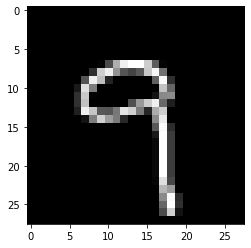

In [7]:
plt.imshow(imgs[0][0],cmap="gray")

In [0]:
def imshow(imgs):
  imgs = torchvision.utils.make_grid(imgs)
  npimgs = imgs.numpy()
  plt.figure(figsize=(8,8))
  plt.imshow(np.transpose(npimgs,(1,2,0)),cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

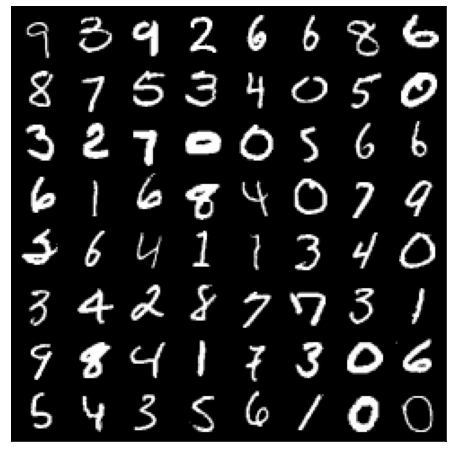

In [9]:
imshow(imgs)

###Normal GAN

In [0]:
z_dim = 100
h1_dim = 128
h2_dim = 256
x_dim = imgs.view(imgs.size(0),-1).size(1)
print(z_dim,h1_dim,h2_dim,x_dim)

100 128 256 784


In [0]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(z_dim,h2_dim),
        nn.ReLU(),
        nn.Linear(h2_dim,x_dim),
        nn.Sigmoid(),
    )

  def forward(self,inputs):
    return self.model(inputs)


In [0]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(x_dim,h2_dim),
        nn.ReLU(),
        nn.Linear(h2_dim,1),
        nn.Sigmoid()
    )
  def forward(self,inputs):
    return self.model(inputs)

In [0]:
if torch.cuda.is_available():
  g = Generator().to(device)
  d = Discriminator().to(device)
else:
  g = Generator()
  d = Discriminator()
g_opt = optim.Adam(g.parameters(),lr=0.001)
d_opt = optim.Adam(d.parameters(),lr=0.001)

In [0]:
print(g,d)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
) Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


Epoch:0 GLoss:5.928112631159296 DLoss:0.10370179087639467


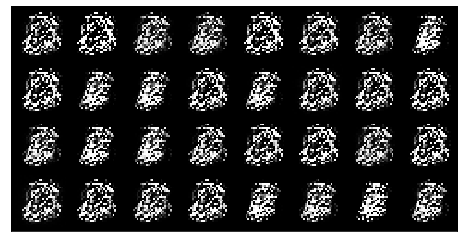

Epoch:1 GLoss:7.297804117202759 DLoss:0.024162498775369197


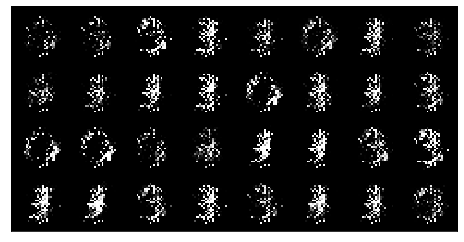

Epoch:2 GLoss:6.477177815142471 DLoss:0.033808202073444676


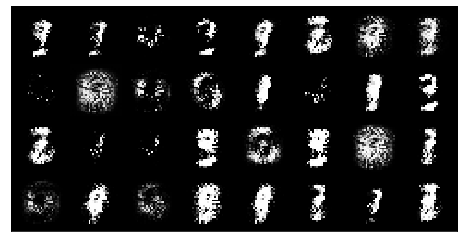

Epoch:3 GLoss:5.7574831610803665 DLoss:0.09353164786290226


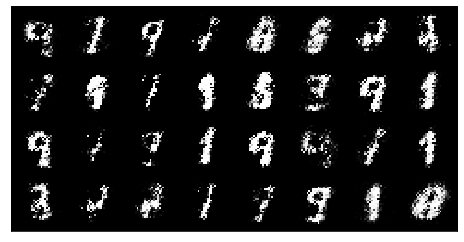

Epoch:4 GLoss:5.374257271986272 DLoss:0.14782261723743828


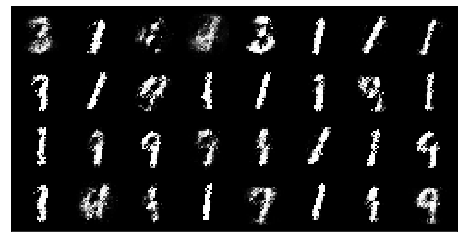

Epoch:5 GLoss:4.397242010275184 DLoss:0.25214075820167053


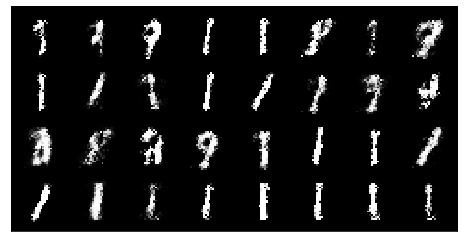

Epoch:6 GLoss:3.6638568184777363 DLoss:0.3520611477559055


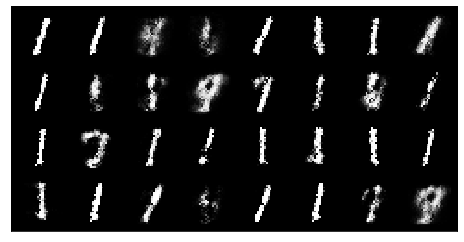

Epoch:7 GLoss:3.4452853896724642 DLoss:0.39712616378691656


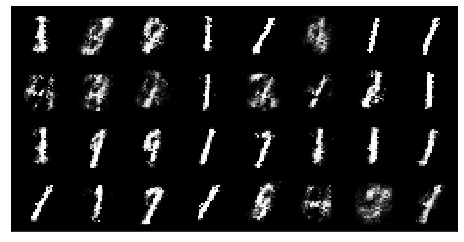

Epoch:8 GLoss:3.441718530044881 DLoss:0.4732582033443044


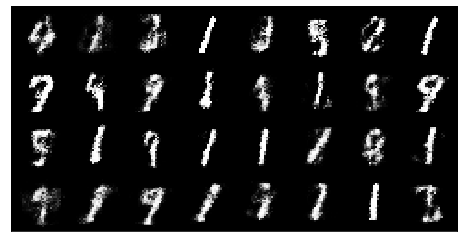

Epoch:9 GLoss:3.142074306382299 DLoss:0.5225309178487324


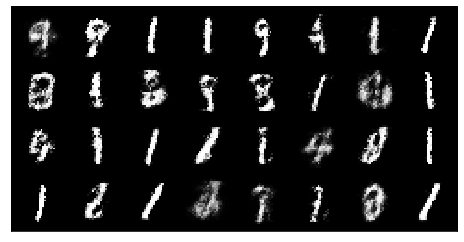

Epoch:10 GLoss:3.1045722074345994 DLoss:0.5746696334181309


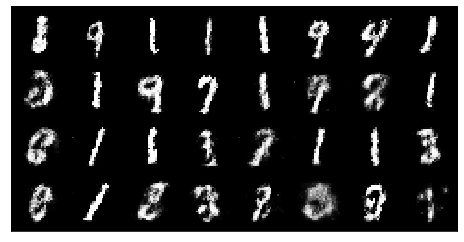

Epoch:11 GLoss:3.0071805349545184 DLoss:0.5942350199608915


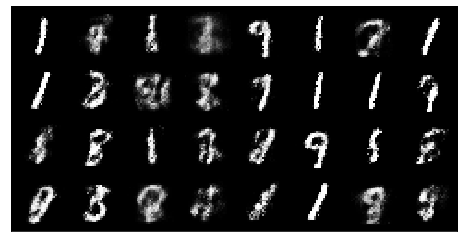

Epoch:12 GLoss:2.894256183587666 DLoss:0.616905695149131


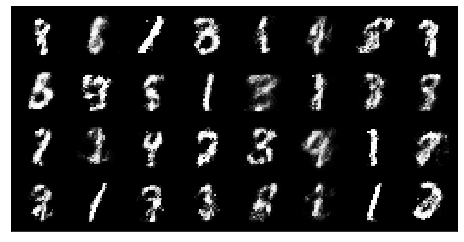

Epoch:13 GLoss:2.746186063869167 DLoss:0.6439407912970606


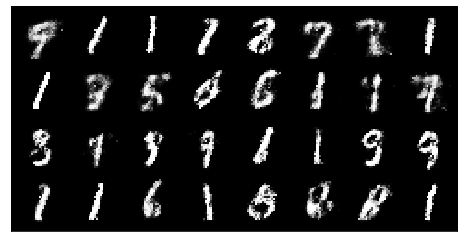

Epoch:14 GLoss:2.710421736433562 DLoss:0.6593517023108916


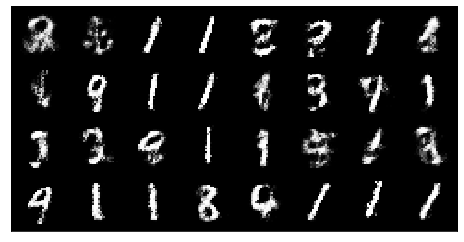

Epoch:15 GLoss:2.6498878356744484 DLoss:0.6660883584891809


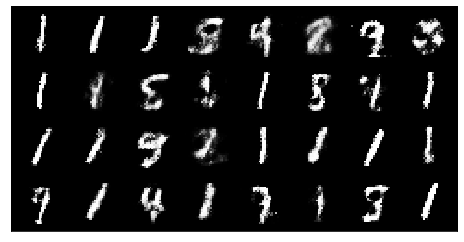

Epoch:16 GLoss:2.551275339207924 DLoss:0.6760763506899511


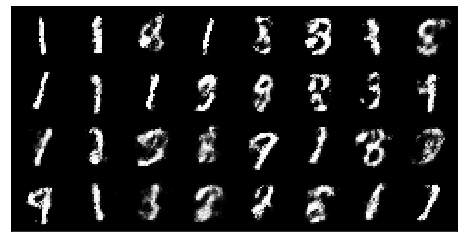

Epoch:17 GLoss:2.4353560473618985 DLoss:0.6871384566208956


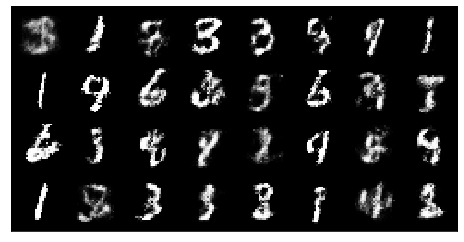

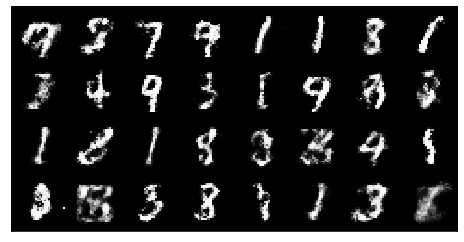

Epoch:19 GLoss:2.401090170020488 DLoss:0.6952835811353696


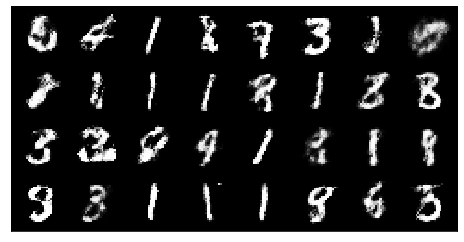

Epoch:20 GLoss:2.36204108131974 DLoss:0.7077348200497089


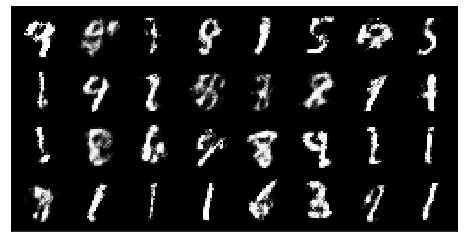

Epoch:21 GLoss:2.2976507998224514 DLoss:0.7167413316365244


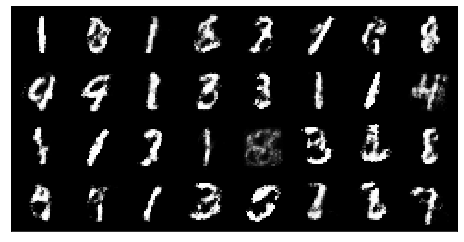

Epoch:22 GLoss:2.17096304537645 DLoss:0.7199337302621748


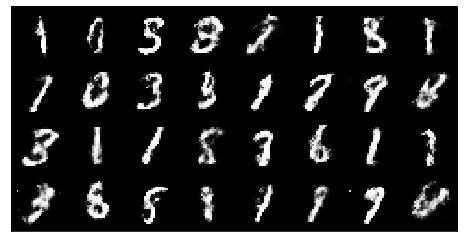

Epoch:23 GLoss:2.2596706144336953 DLoss:0.7263077663333177


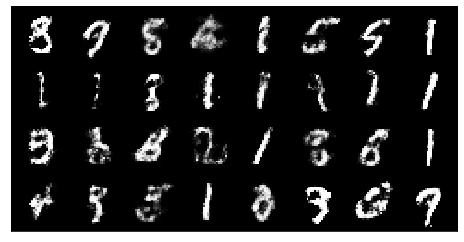

Epoch:24 GLoss:2.2603590817593817 DLoss:0.7312845328469266


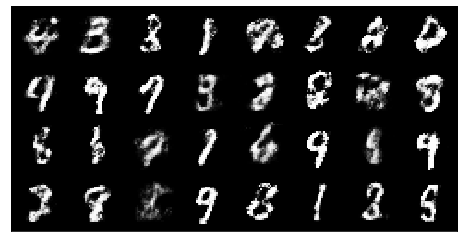

Epoch:25 GLoss:2.2247670951174268 DLoss:0.7285614502646013


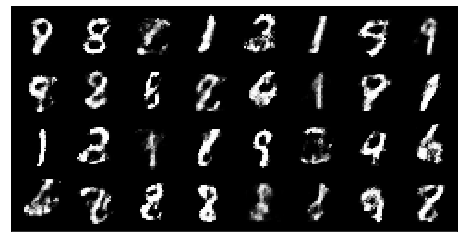

Epoch:26 GLoss:2.1490065252094634 DLoss:0.7216157877940867


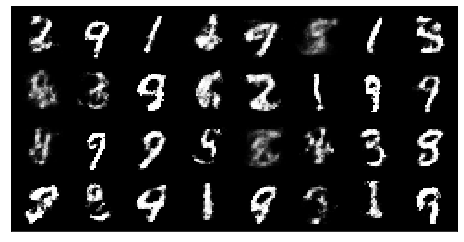

Epoch:27 GLoss:2.193785347028582 DLoss:0.7169788234841341


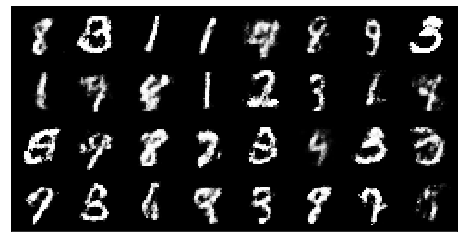

Epoch:28 GLoss:2.240462415508116 DLoss:0.7156349603873072


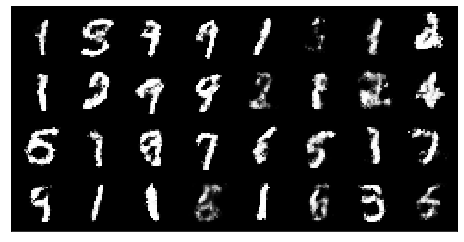

In [0]:
for epoch in range(50):
  g_loss_run = 0.0
  d_loss_run = 0.0
  for i,data in enumerate(traindataloader):
    x, _ = data
    if torch.cuda.is_available():
      x = x.view(x.size(0),-1).to(device)
    else:
      x = x.view(x.size(0),-1)
    batch = x.size(0)

    if torch.cuda.is_available():
      one_labels = torch.ones(batch,1).to(device)
      zero_labels = torch.zeros(batch,1).to(device)
      z = torch.randn(batch,z_dim).to(device)
    else:
      one_labels = torch.ones(batch,1)
      zero_labels = torch.zeros(batch,1)
      z = torch.randn(batch,z_dim)

    d_real = d(x)
    d_fake = d(g(z))

    d_real_loss = func.binary_cross_entropy(d_real,one_labels)
    d_fake_loss = func.binary_cross_entropy(d_fake,zero_labels)
    d_loss = d_real_loss + d_fake_loss

    d_opt.zero_grad()
    d_loss.backward()
    d_opt.step()

    if torch.cuda.is_available():
      z = torch.randn(batch,z_dim).to(device)
    else:
      z = torch.randn(batch,z_dim)
    d_fake = d(g(z))
    g_loss = func.binary_cross_entropy(d_fake,one_labels)

    g_opt.zero_grad()
    g_loss.backward()
    g_opt.step()

    g_loss_run += g_loss.item()
    d_loss_run += d_loss.item()

  print('Epoch:{} GLoss:{} DLoss:{}'.format(epoch,g_loss_run/(i+1),d_loss_run/(i+1)))
  samples = g(z).detach()
  samples = samples.view(samples.size(0),1,28,28).cpu()
  imshow(samples)






###C GAN

In [0]:
z_dim = 100
h_dim = 256
y_dim = 10
x_dim = imgs.view(imgs.size(0),-1).size(1)
print(z_dim,h_dim,y_dim,x_dim)

100 256 10 784


In [0]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(z_dim+y_dim,h_dim),
        nn.ReLU(),
        nn.Linear(h_dim,x_dim),
        nn.Sigmoid(),
    )
  def forward(self,x,y):
    inputs = torch.cat((x,y),1)
    return self.model(inputs)

In [0]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(x_dim+y_dim,h_dim),
        nn.ReLU(),
        nn.Linear(h_dim,1),
        nn.Sigmoid()
    )
  def forward(self,x,y):
    inputs = torch.cat((x,y),1)
    return self.model(inputs)

In [0]:
if torch.cuda.is_available():
  g = Generator().to(device)
  d = Discriminator().to(device)
else:
  g = Generator()
  d = Generator()
print(g,d)

Generator(
  (model): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
) Discriminator(
  (model): Sequential(
    (0): Linear(in_features=794, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [0]:
import torch.optim as optim
d_opt = optim.Adam(d.parameters(),lr=0.001)
g_opt = optim.Adam(g.parameters(),lr=0.001)

In [0]:
for epoch in range(200):
  g_loss_run = 0.0
  d_loss_run = 0.0
  for i,data in enumerate(traindataloader):

    x , y = data

    if torch.cuda.is_available():

      x = x.view(x.size(0),-1).to(device)
      y = y.to(device)
      batch = x.size(0)
      nb_digits = 10
      y_onehot = torch.FloatTensor(batch, nb_digits).to(device)
      y_onehot.zero_()
      y_onehot.scatter_(1, y.view(-1,1), 1)
      one_labels = torch.ones(batch,1).to(device)
      zero_labels = torch.zeros(batch,1).to(device)
      z = torch.randn(batch,z_dim).to(device)


    else:
      x = x.view(x.size(0),-1)
      batch = x.size(0)
      nb_digits = 10
      y_onehot = torch.FloatTensor(batch, nb_digits)
      y_onehot.zero_()
      y_onehot.scatter_(1, y.view(-1,1), 1)
      ones_labels = torch.ones(batch,1)
      zeros_labels = torch.zeros(batch,1)
      z = torch.randn(batch,z_dim)
    
    d_real = d(x,y_onehot)
    d_fake = d(g(z,y_onehot),y_onehot)

    d_real_loss = func.binary_cross_entropy(d_real,one_labels)
    d_fake_loss = func.binary_cross_entropy(d_fake,zero_labels)
    d_loss = d_real_loss + d_fake_loss

    d_opt.zero_grad()
    d_loss.backward()
    d_opt.step()

    if torch.cuda.is_available():
      z = torch.randn(batch,z_dim).to(device)
    else:
      z = torch.randn(batch,z_dim)

    d_fake = d(g(z,y_onehot),y_onehot)
    g_loss = func.binary_cross_entropy(d_fake,one_labels)

    g_opt.zero_grad()
    g_loss.backward()
    g_opt.step()

    g_loss_run += g_loss.item()
    d_loss_run += d_loss.item()

  print('Epoch:{} GLoss:{} DLoss:{}'.format(epoch,g_loss_run/(i+1),d_loss_run/(i+1)))
  samples = g(z,y_onehot).detach()
  samples = samples.view(samples.size(0),1,28,28).cpu()
  imshow(samples)

    

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def onehot(y):
    l = [0 for i in range(10)]
    l[y] = 1
    return torch.FloatTensor(l)
  

In [0]:
if torch.cuda.is_available():
  z = torch.randn(1,z_dim).to(device)
  y = onehot(8).view(1,10).to(device)
else:
  z = torch.randn(1,z_dim)
  y = onehot(8).view(1,10)
print(y)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], device='cuda:0')


In [0]:
print(y.shape,z.shape)

torch.Size([1, 10]) torch.Size([1, 100])


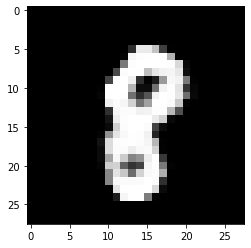

In [0]:
sample = g(z,y).detach()
sample = sample.view(sample.size(0),1,28,28).cpu()
plt.imshow(sample[0][0],cmap='gray')

###SR GAN

In [0]:
class Convoluter(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,16,3)
    self.conv2 = nn.Conv2d(16,32,3)
    self.conv3 = nn.Conv2d(32,64,3)
  def forward(self,inputs):
    idx = []
    sizes = []
    inputs = func.relu(self.conv1(inputs))
    sizes.append(inputs.size())
    inputs,indices = func.max_pool2d_with_indices(inputs,2)
    #print(indices)
    idx.append(indices)
    inputs = func.relu(self.conv2(inputs))
    sizes.append(inputs.size())
    inputs,indices = func.max_pool2d_with_indices(inputs,2)
    #print(indices)
    idx.append(indices)
    inputs = func.relu(self.conv3(inputs))
    sizes.append(inputs.size())
    inputs,indices = func.max_pool2d_with_indices(inputs,2)
    #print(inputs)
    idx.append(indices)
    sizes.append(inputs.size())
    return (inputs,idx,sizes)

In [257]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [0]:
c = Convoluter()

In [0]:
p = c(imgs[0][0].view(1,1,28,28))

In [0]:
class DC(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.ConvTranspose2d(64,32,3)
    self.conv2 = nn.ConvTranspose2d(32,16,3)
    self.conv3 = nn.ConvTranspose2d(16,1,3)
  def forward(self,inputs,idx,sizes):
    inputs = func.max_unpool2d(input=inputs,indices=idx[2],kernel_size=(2,2),output_size=sizes[2])
    inputs = self.conv1(inputs)
    inputs = func.max_unpool2d(input=inputs,indices=idx[1],kernel_size=(2,2),output_size=sizes[1])
    inputs = self.conv2(inputs)
    inputs = func.max_unpool2d(input=inputs,indices=idx[0],kernel_size=(2,2),output_size=sizes[0])
    inputs = self.conv3(inputs)

    return inputs

In [0]:
d = DC()

In [0]:
q = d(p[0],p[1],p[2])

In [267]:
q.shape

torch.Size([1, 1, 28, 28])

In [0]:
class Classifier(nn.Module):
  def __init__(self,x_size):
    super().__init__()
    self.x_size = x_size
    self.model = nn.Sequential(
        nn.Linear(x_size,512),
        nn.Linear(512,10),
        nn.Softmax(dim=1)
    )
  def forward(self,inputs):
    inputs = inputs.view(-1,self.x_size)
    return self.model(inputs)

In [0]:
classifier = Classifier(torch.flatten(p[0],1,-1).size(1))

In [0]:
import torch.optim as optim
c_opt = optim.Adam(c.parameters(),lr=0.001)
classifier_opt = optim.Adam(c.parameters(),lr=0.001)
d_opt = optim.Adam(d.parameters(),lr=0.001)

In [0]:
loss_conv = nn.BCELoss()
loss_deconv = nn.BCELoss()

###Trainig Convolutor to convolute images for classification

In [309]:
for epoch in range(10):
    for i,data in enumerate(traindataloader):
      x,y = data
      output = c(x)
      output = classifier(output[0])
      y_onehot = torch.FloatTensor(64, 10)
      y_onehot.zero_()
      y_onehot.scatter_(1, y.view(-1,1), 1)
      loss = loss_conv(output,y_onehot)
      c_opt.zero_grad()
      classifier_opt.zero_grad()
      loss.backward()
      classifier_opt.step()
      c_opt.step()
    print("loss:",loss)

RuntimeError: ignored